<a href="https://colab.research.google.com/github/shimu-7/lung-cancer-detection/blob/main/lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive to Colab
drive.mount('/content/drive')

# Specify the path to your zip file in Google Drive
drive_zip_path = '/content/drive/MyDrive/lung-cancer-dataset.zip'

# Specify the target directory in Colab to copy the zip file
colab_target_directory = '/content/'

# Copy the zip file from Google Drive to Colab
shutil.copy(drive_zip_path, colab_target_directory)

# List the files in the target directory to verify the copy
!ls -l "{colab_target_directory}"

Mounted at /content/drive
total 446392
drwx------ 5 root root      4096 Jan 28 19:01 drive
-rw------- 1 root root 457091820 Jan 28 19:01 lung-cancer-dataset.zip
drwxr-xr-x 1 root root      4096 Jan 25 14:23 sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/lung-cancer-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_path = '/content/lung-cancer-dataset/train'
test_path = '/content/lung-cancer-dataset/test'

# Image data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Assuming three classes: benign, malignant, and normal
    shuffle=True
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle test data
)

Found 1831 images belonging to 3 classes.
Found 1375 images belonging to 3 classes.


In [ ]:
# # Normalize
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [ ]:
alexnet_model = Sequential()

# Layer 1
alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(BatchNormalization())

# Layer 2
alexnet_model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(BatchNormalization())

# Layer 3
alexnet_model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
alexnet_model.add(BatchNormalization())

# Layer 4
alexnet_model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
alexnet_model.add(BatchNormalization())

# Layer 5
alexnet_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
alexnet_model.add(BatchNormalization())

# Flatten the output
alexnet_model.add(Flatten())

# Dense layers
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))

# Output Layer
alexnet_model.add(Dense(3, activation='softmax'))

In [ ]:
alexnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                        

In [ ]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model.fit(train_ds, epochs=30, validation_data=validation_ds, callbacks=[early_stopping])
history = alexnet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
58/58 [==============================] - 376s 6s/step - loss: 3.4967 - accuracy: 0.6090 - val_loss: 89.5068 - val_accuracy: 0.3418
Epoch 2/10
58/58 [==============================] - 336s 6s/step - loss: 0.8770 - accuracy: 0.6466 - val_loss: 0.8455 - val_accuracy: 0.5411
Epoch 3/10
58/58 [==============================] - 372s 6s/step - loss: 0.8167 - accuracy: 0.6532 - val_loss: 0.8673 - val_accuracy: 0.5905
Epoch 4/10
58/58 [==============================] - 335s 6s/step - loss: 0.7218 - accuracy: 0.6439 - val_loss: 1.5641 - val_accuracy: 0.4829
Epoch 5/10
58/58 [==============================] - 337s 6s/step - loss: 0.8148 - accuracy: 0.6630 - val_loss: 1.6818 - val_accuracy: 0.5549
Epoch 6/10
58/58 [==============================] - 336s 6s/step - loss: 0.7422 - accuracy: 0.6690 - val_loss: 0.7865 - val_accuracy: 0.6131
Epoch 7/10
58/58 [==============================] - 366s 6s/step - loss: 0.6968 - accuracy: 0.6641 - val_loss: 0.7041 - val_accuracy: 0.6931
Epoch 8/10
5

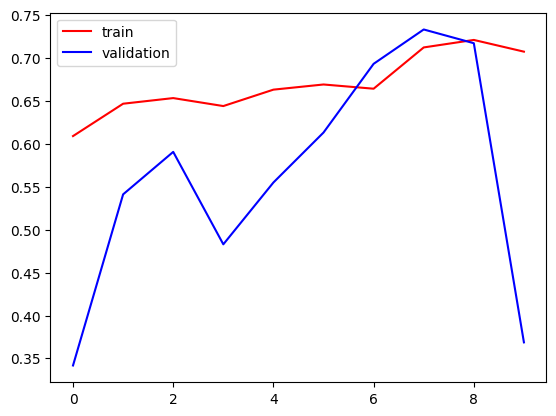

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

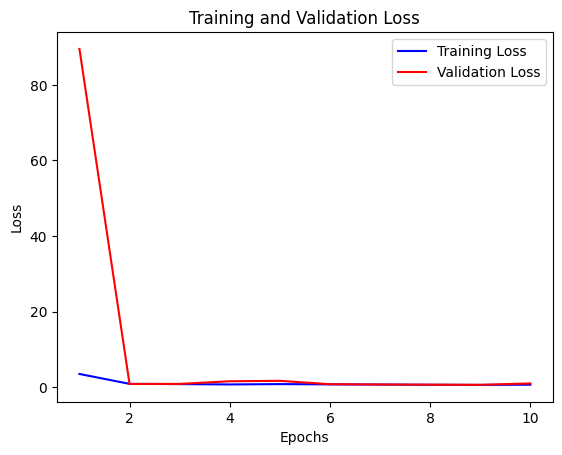

In [ ]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the loss function graph
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 1375 files belonging to 3 classes.
43/43 [==============================] - 62s 1s/step


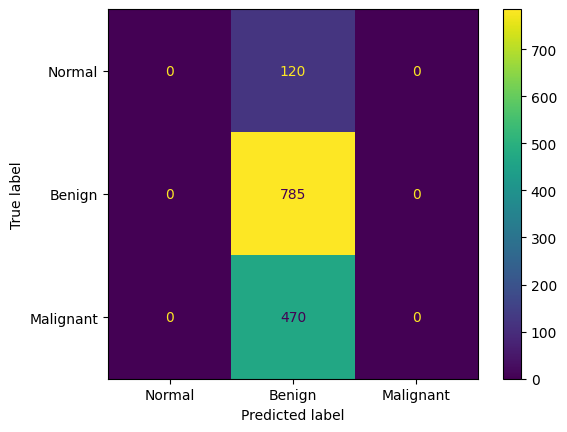

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have trained your model and have a validation dataset
# validation_data = ...  # Your validation data

# Define class names
class_names = ['Normal', 'Benign', 'Malignant']
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/lung-cancer-dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

def resize_images(images, labels):
    resized_images = tf.image.resize(images, (224, 224))
    return resized_images, labels

# Apply resizing to the validation dataset
validation_ds = validation_ds.map(resize_images)

# Extract true labels from the validation dataset
true_labels = np.concatenate([labels.numpy() for _, labels in validation_ds])

# Make predictions using your trained model
predictions = alexnet_model.predict(validation_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Build confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix with class names on the x and y-axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have trained your model and have a validation dataset
# validation_data = ...  # Your validation data

# Define class names
class_names = ['Normal', 'Benign', 'Malignant']
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/lung-cancer-dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

def resize_images(images, labels):
    resized_images = tf.image.resize(images, (224, 224))
    return resized_images, labels

# Apply resizing to the validation dataset
validation_ds = validation_ds.map(resize_images)

# Extract true labels from the validation dataset
true_labels = np.concatenate([labels.numpy() for _, labels in validation_ds])

# Make predictions using your trained model
predictions = alexnet_model.predict(validation_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Build confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix with class names on the x and y-axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
#

Found 1375 files belonging to 3 classes.
43/43 [==============================] - 61s 1s/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/lung-cancer-dataset/validation/Malignant cases/000108 (8).png')

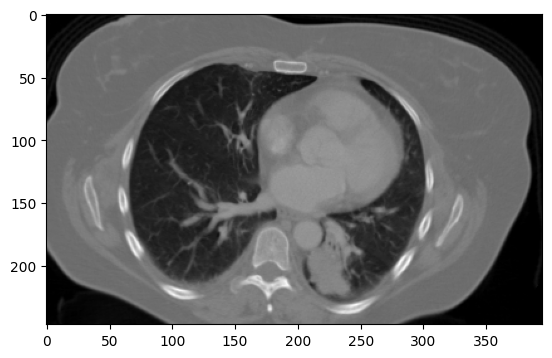

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(247, 395, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
alexnet_model.predict(test_input)

1/1 [==============================] - 0s 281ms/step


array([[0., 1., 0.]], dtype=float32)